In [ ]:
#Análisis de Datos Globales sobre Energía Sostenible
#Introducción
#Este Jupyter Notebook presenta un análisis exhaustivo de los datos globales sobre acceso a la energía, uso de energías renovables, y sus implicaciones socioeconómicas. Utilizando datos desde el año 2000 hasta el 2020, exploraremos cómo diferentes naciones han progresado en términos de infraestructura energética y sostenibilidad ambiental, y cómo estos factores se correlacionan con indicadores económicos como el PIB per cápita.
#Los datos analizados incluyen varias métricas clave, como el porcentaje de población con acceso a electricidad, el uso de combustibles limpios para cocinar, la generación de electricidad a partir de fuentes renovables y fósiles, y las emisiones de CO2. Estos indicadores son cruciales para entender las políticas energéticas globales y sus impactos tanto en el desarrollo humano como en el medio ambiente.

#Objetivos del Análisis
#Evaluar el Acceso a la Electricidad: Analizar cómo ha cambiado el acceso a la electricidad a lo largo del tiempo y su impacto en el desarrollo humano y económico.
#Explorar el Uso de Energías Renovables: Determinar la evolución del uso de energías renovables y su contribución al suministro energético global.
#Relación entre Energía y Economía: Estudiar las interacciones entre el consumo de energía, las emisiones de CO2, y el crecimiento económico.
#Identificar Tendencias y Correlaciones: Descubrir patrones significativos y correlaciones entre los diferentes indicadores energéticos y económicos.

In [35]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load the CSV file to check the contents
file_path = 'Copia de global-data-on-sustainable-energy (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its basic information
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

(        Entity  Year  Access to electricity (% of population)  \
 0  Afghanistan  2000                                 1.613591   
 1  Afghanistan  2001                                 4.074574   
 2  Afghanistan  2002                                 9.409158   
 3  Afghanistan  2003                                14.738506   
 4  Afghanistan  2004                                20.064968   
 
    Access to clean fuels for cooking  \
 0                                6.2   
 1                                7.2   
 2                                8.2   
 3                                9.5   
 4                               10.9   
 
    Renewable-electricity-generating-capacity-per-capita  \
 0                                               9.22      
 1                                               8.86      
 2                                               8.47      
 3                                               8.09      
 4                                               7.75 

In [37]:
#Preparar los datos: cargar el archivo CSV y hacer una inspección inicial.
#Generar estadísticas descriptivas: calcular estadísticas básicas como media, mediana, etc.
#Crear gráficos de barras y gráficos circulares: visualizar la distribución de algunas variables categóricas.
#Calcular cuartiles, identificar valores atípicos y crear un diagrama de caja: para entender mejor la dispersión y los valores extremos en los datos.
#Crear gráficos de líneas y de dispersión: para observar tendencias y relaciones entre dos variables.
#Calcular correlación y regresión: para analizar la relación estadística entre variables.
#Primero, vamos a cargar el archivo y ver qué datos contiene. Esto nos ayudará a entender mejor cómo proceder con los siguientes pasos.
#El conjunto de datos cargado contiene varias columnas relacionadas con el acceso a la energía, el uso de fuentes renovables, la producción de electricidad y variables económicas y demográficas por país y año. Aquí están algunos detalles clave sobre las columnas:

In [38]:
# Basic data cleaning: Removing rows with all NaN values and filling remaining NaNs with zeros for simplicity
cleaned_data = data.dropna(how='all').fillna(0)

# Generating summary statistics for the numerical columns
summary_statistics = cleaned_data.describe()

summary_statistics

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000
mean,2010.038367,78.717386,60.325678,84.271779,4.028212e+07,30.902949,69.960052,12.985755,23.830074,36.377600,25743.981745,5.006271,1.411153e+05,4.966813,3.142627,12257.185045,6.330400e+05,18.241387,14.818632
std,6.054228,30.514395,40.380261,216.416174,2.004093e+08,29.996934,347.089451,71.776775,104.145855,34.341921,34773.221366,3.643481,7.286793e+05,11.313904,5.519828,19262.267603,1.585337e+06,24.157809,66.339507
min,2000.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-62.075920,0.000000,0.000000e+00,-40.900557,-175.198242
25%,2005.000000,58.721474,14.600000,0.000000,0.000000e+00,4.480000,0.280000,0.000000,0.040000,2.198241,3116.737300,2.990000,6.500000e+02,0.000000,0.500010,950.880346,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.264870,78.850000,7.890000,0.000000e+00,20.710000,2.940000,0.000000,1.420000,26.824644,13120.570000,4.120000,7.280000e+03,0.000000,3.184043,4043.662923,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,67.600000,2.070000e+06,52.610000,26.520000,0.000000,9.560000,64.022670,33892.780000,5.880000,5.133000e+04,4.291226,5.543639,13992.744480,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [39]:
#Año: Los datos cubren desde el año 2000 hasta el 2020.
#Acceso a electricidad: El 75% de las observaciones muestran un acceso a la electricidad de al menos el 100%, pero el mínimo es 0%, lo que indica una variabilidad considerable entre diferentes países o regiones.
#Acceso a combustibles limpios para cocinar: Hay una gran disparidad, con una media del 60.33% y un mínimo del 0%.
#Energía renovable per cápita: La capacidad generadora de energía renovable per cápita varía significativamente, con valores máximos de 3060.19 pero una mediana de solo 7.89, lo que indica que algunos países están muy avanzados en esto.
#Intensidad energética de la energía primaria: La intensidad varía desde un mínimo de 0 MJ por cada $2017 PPP del PIB hasta un máximo de 32.57 MJ.

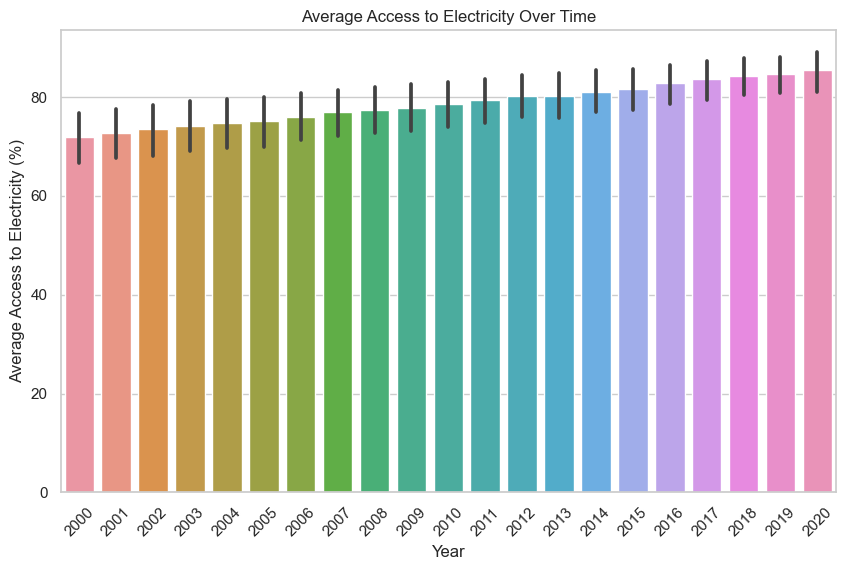

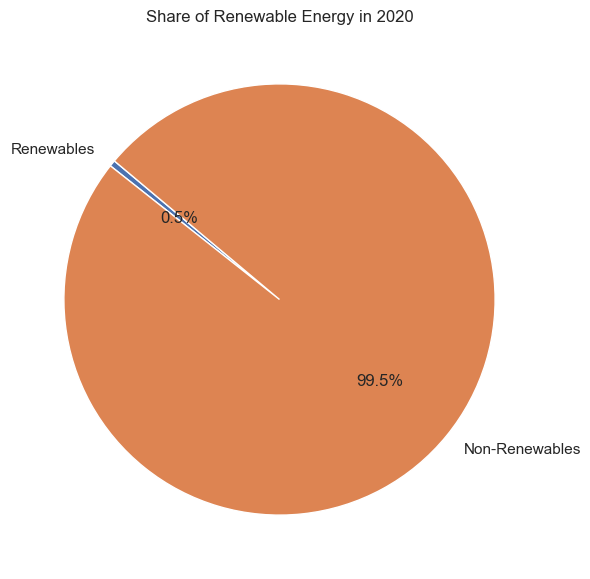

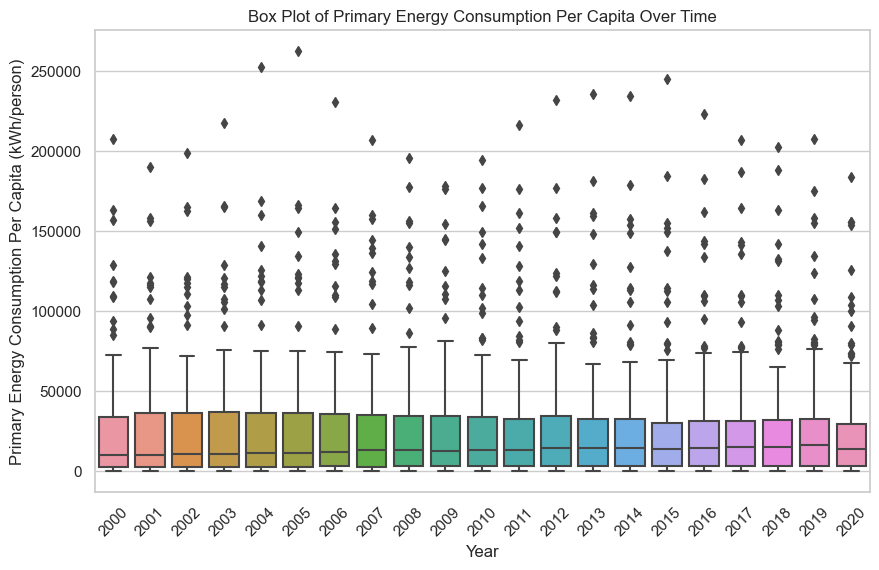

c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


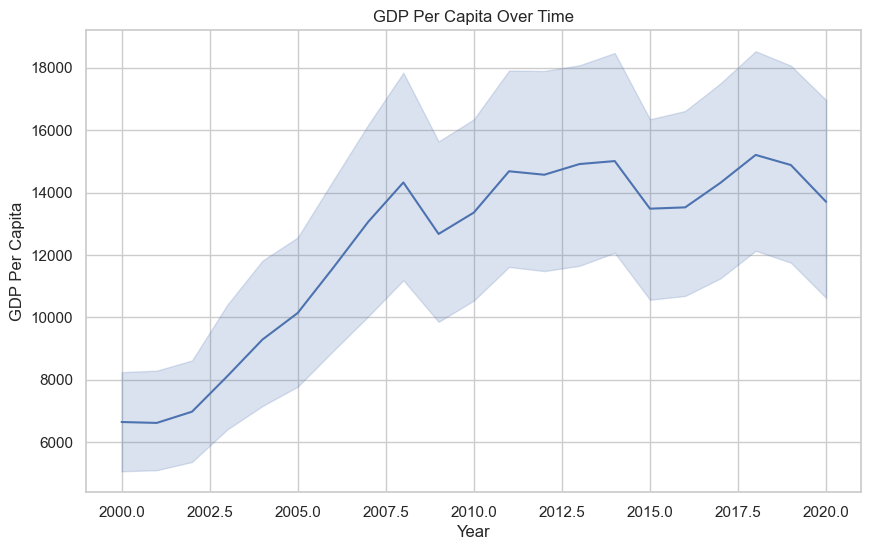

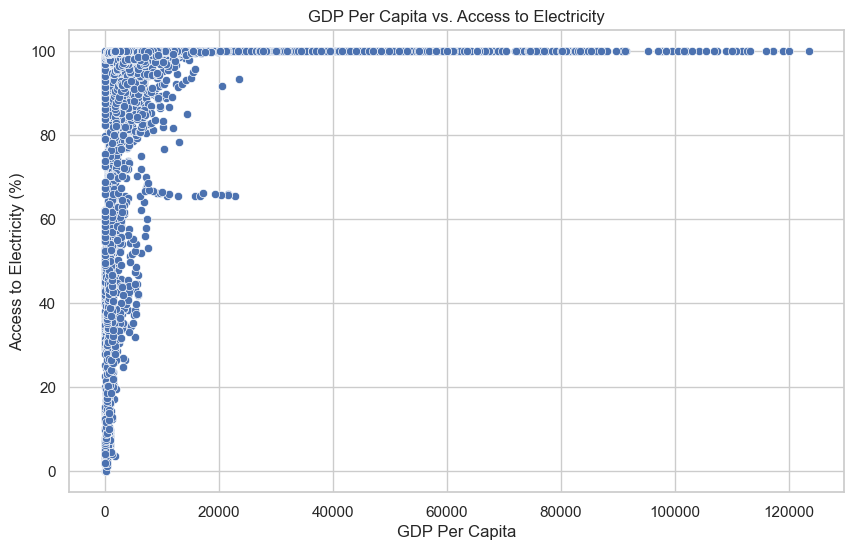

ValueError: could not convert string to float: 'Afghanistan'

In [40]:
# Setting up the aesthetic for plots
sns.set(style="whitegrid")

# Create a bar chart for the 'Access to electricity (% of population)'
plt.figure(figsize=(10, 6))
sns.barplot(x="Year", y="Access to electricity (% of population)", data=cleaned_data, estimator=lambda x: sum(x)/len(x))
plt.title('Average Access to Electricity Over Time')
plt.xticks(rotation=45)
plt.ylabel('Average Access to Electricity (%)')
plt.xlabel('Year')
plt.show()

# Create a pie chart for the share of renewable energy in the latest year (2020)
latest_year_data = cleaned_data[cleaned_data['Year'] == 2020]
labels = ['Renewables', 'Non-Renewables']
sizes = [
    latest_year_data['Renewable energy share in the total final energy consumption (%)'].mean(),
    100 - latest_year_data['Renewable energy share in the total final energy consumption (%)'].mean()
]
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Share of Renewable Energy in 2020')
plt.show()

# Create a box plot for primary energy consumption per capita
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Primary energy consumption per capita (kWh/person)', data=cleaned_data)
plt.title('Box Plot of Primary Energy Consumption Per Capita Over Time')
plt.xticks(rotation=45)
plt.ylabel('Primary Energy Consumption Per Capita (kWh/person)')
plt.xlabel('Year')
plt.show()

# Create a line plot for GDP per capita over time
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="gdp_per_capita", data=cleaned_data)
plt.title('GDP Per Capita Over Time')
plt.ylabel('GDP Per Capita')
plt.xlabel('Year')
plt.show()

# Scatter plot of GDP per capita vs. Access to electricity
plt.figure(figsize=(10, 6))
sns.scatterplot(x="gdp_per_capita", y="Access to electricity (% of population)", data=cleaned_data)
plt.title('GDP Per Capita vs. Access to Electricity')
plt.ylabel('Access to Electricity (%)')
plt.xlabel('GDP Per Capita')
plt.show()

# Calculate the correlation matrix
correlation_matrix = cleaned_data.corr()
correlation_matrix


In [41]:
# Filtrar el DataFrame para excluir datos de Afghanistan
data_without_afghanistan = cleaned_data[cleaned_data['Entity'] != 'Afghanistan',]

# Configuración estética de los gráficos
sns.set(style="whitegrid")

# Gráfico de barras para el 'Access to electricity (% of population)'
plt.figure(figsize=(10, 6))
sns.barplot(x="Year", y="Access to electricity (% of population)", data=data_without_afghanistan, estimator=lambda x: sum(x)/len(x))
plt.title('Average Access to Electricity Over Time')
plt.xticks(rotation=45)
plt.ylabel('Average Access to Electricity (%)')
plt.xlabel('Year')
plt.show()

# Gráfico circular para la participación de energías renovables en el año más reciente (2020)
latest_year_data = data_without_afghanistan[data_without_afghanistan['Year'] == 2020]
labels = ['Renewables', 'Non-Renewables']
sizes = [
    latest_year_data['Renewable energy share in the total final energy consumption (%)'].mean(),
    100 - latest_year_data['Renewable energy share in the total final energy consumption (%)'].mean()
]
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Share of Renewable Energy in 2020')
plt.show()

# Diagrama de caja para el consumo de energía primaria per cápita
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Primary energy consumption per capita (kWh/person)', data=data_without_afghanistan)
plt.title('Box Plot of Primary Energy Consumption Per Capita Over Time')
plt.xticks(rotation=45)
plt.ylabel('Primary Energy Consumption Per Capita (kWh/person)')
plt.xlabel('Year')
plt.show()

# Gráfico de línea para el PIB per cápita a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="gdp_per_capita", data=data_without_afghanistan)
plt.title('GDP Per Capita Over Time')
plt.ylabel('GDP Per Capita')
plt.xlabel('Year')
plt.show()

# Gráfico de dispersión del PIB per cápita vs. Acceso a la electricidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x="gdp_per_capita", y="Access to electricity (% of population)", data=data_without_afghanistan)
plt.title('GDP Per Capita vs. Access to Electricity')
plt.ylabel('Access to Electricity (%)')
plt.xlabel('GDP Per Capita')
plt.show()

# Calcular la matriz de correlación
correlation_matrix = data_without_afghanistan.corr()
correlation_matrix

InvalidIndexError: (0       False
1       False
2       False
3       False
4       False
        ...  
3644     True
3645     True
3646     True
3647     True
3648     True
Name: Entity, Length: 3649, dtype: bool,)

In [ ]:
#Gráfico de Barras - Acceso a la Electricidad a lo Largo del Tiempo: Este gráfico muestra cómo ha evolucionado el acceso a la electricidad a lo largo de los años en promedio.
#Gráfico Circular - Participación de Energía Renovable en 2020: Presenta el porcentaje de energía renovable en el consumo total de energía final en el año 2020.
#Diagrama de Caja - Consumo de Energía Primaria Per Cápita: Expone la distribución del consumo de energía primaria per cápita a lo largo de los años, identificando posibles valores atípicos.
#Gráfico de Líneas - PIB Per Cápita a lo Largo del Tiempo: Muestra cómo ha cambiado el PIB per cápita con el paso de los años.
#Gráfico de Dispersión - PIB Per Cápita vs. Acceso a la Electricidad: Explora la relación entre el PIB per cápita y el acceso a la electricidad.
#Además, he calculado la matriz de correlación para entender las relaciones entre las variables. Algunas observaciones interesantes son:
#Existe una correlación fuerte entre el consumo de energía y las emisiones de CO2, lo que es esperado ya que un mayor consumo de energía a menudo implica mayores emisiones.
#Hay una correlación positiva entre el PIB per cápita y el acceso a electricidad, lo que sugiere que a medida que mejora la economía de un país, también lo hace el acceso a servicios básicos como la electricidad.
#La correlación entre el crecimiento del PIB y otras variables es generalmente baja, lo que puede indicar que el crecimiento económico anual es influenciado por múltiples factores además del desarrollo energético y el acceso a recursos.

C:\Users\Ro\AppData\Local\Temp\ipykernel_13704\1711797291.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Renewable-electricity-generating-capacity-per-capita (%) Change', data=cleaned_data, estimator='mean', ci=None)
c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


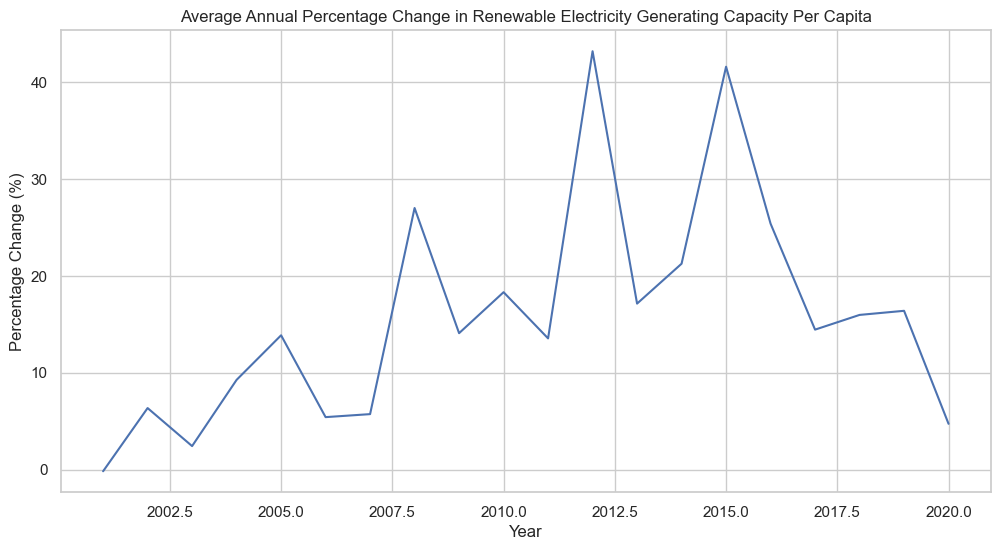

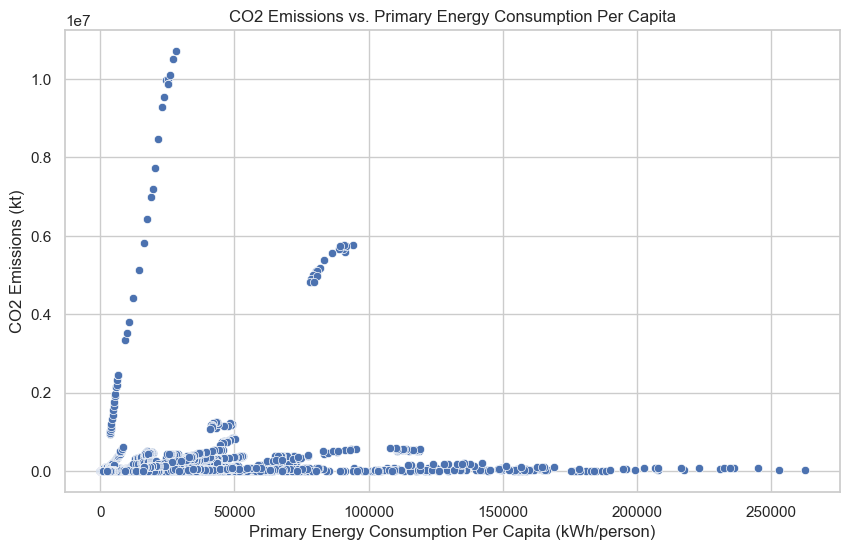

In [42]:
# 1. Crecimiento Anual de la Capacidad de Energía Renovable Per Cápita
# Calculating the year-on-year percentage change
cleaned_data['Renewable-electricity-generating-capacity-per-capita (%) Change'] = cleaned_data.groupby('Entity')['Renewable-electricity-generating-capacity-per-capita'].pct_change() * 100

# Visualize the average annual change by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Renewable-electricity-generating-capacity-per-capita (%) Change', data=cleaned_data, estimator='mean', ci=None)
plt.title('Average Annual Percentage Change in Renewable Electricity Generating Capacity Per Capita')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# 2. Emisiones de CO2 en Relación al Consumo de Energía Primaria Per Cápita
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Primary energy consumption per capita (kWh/person)', y='Value_co2_emissions_kt_by_country', data=cleaned_data)
plt.title('CO2 Emissions vs. Primary Energy Consumption Per Capita')
plt.xlabel('Primary Energy Consumption Per Capita (kWh/person)')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()


In [ ]:
#Gráfico de Línea - Cambio Anual Promedio en la Capacidad de Generación de Energía Renovable Per Cápita:
#Este gráfico muestra el cambio porcentual medio anual en la capacidad de generación de energía renovable per cápita a nivel global. Los cambios porcentuales se calculan de un año a otro, y se muestra el promedio de todos los países disponibles en el conjunto de datos.
#Gráfico de Dispersión - Emisiones de CO2 vs. Consumo de Energía Primaria Per Cápita:
#Este gráfico explora la relación entre las emisiones de CO2 y el consumo de energía primaria per cápita. Cada punto en el gráfico representa un país en un año específico, mostrando cómo las mayores tasas de consumo de energía se relacionan con las emisiones de CO2.

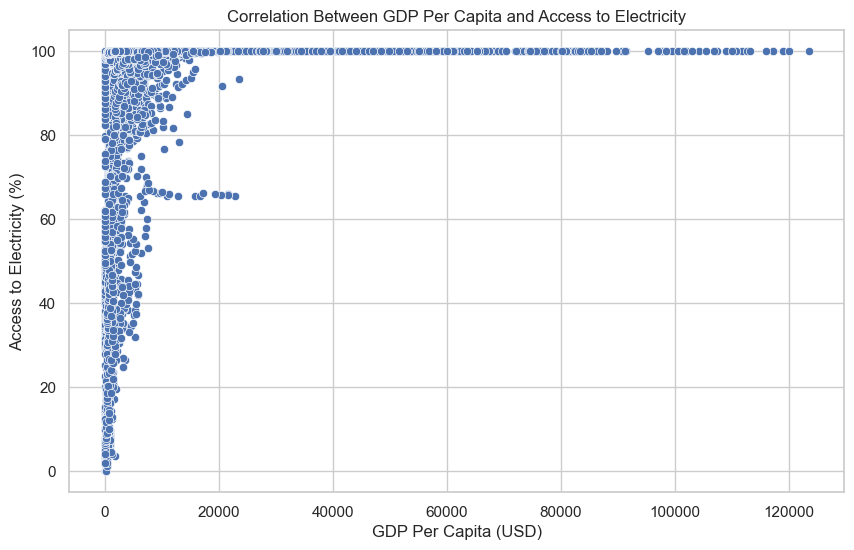

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="gdp_per_capita", y="Access to electricity (% of population)", data=cleaned_data)
plt.title('Correlation Between GDP Per Capita and Access to Electricity')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Access to Electricity (%)')
plt.grid(True)
plt.show()


In [45]:
# Correlación Entre Acceso a Electricidad y PIB Per Cápita
#Este análisis busca entender cómo el acceso a la electricidad se relaciona con el desarrollo económico de un país, medido a través del PIB per cápita.

c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


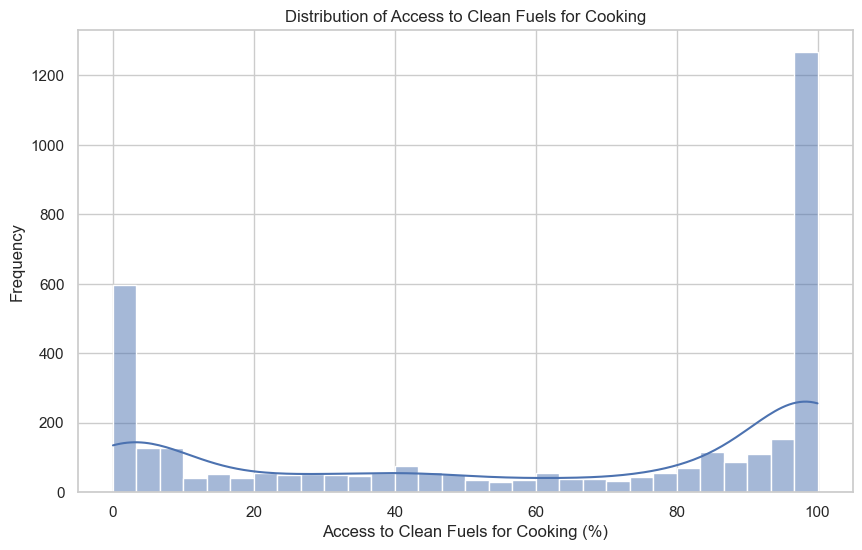

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Access to clean fuels for cooking'], bins=30, kde=True)
plt.title('Distribution of Access to Clean Fuels for Cooking')
plt.xlabel('Access to Clean Fuels for Cooking (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [47]:
#Distribución del Acceso a Combustibles Limpios para Cocinar
#Este gráfico puede ayudar a visualizar qué tan extendido está el acceso a métodos de cocina más limpios y sostenibles en diferentes países o a lo largo del tiempo.

C:\Users\Ro\AppData\Local\Temp\ipykernel_13704\2474387199.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Energy intensity level of primary energy (MJ/$2017 PPP GDP)', data=cleaned_data, estimator='mean', ci=None)
c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


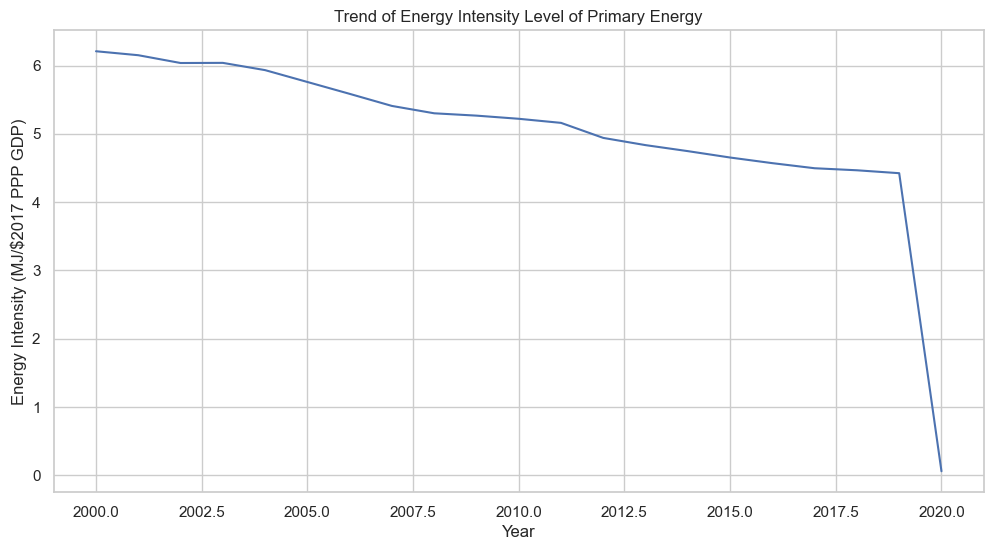

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Energy intensity level of primary energy (MJ/$2017 PPP GDP)', data=cleaned_data, estimator='mean', ci=None)
plt.title('Trend of Energy Intensity Level of Primary Energy')
plt.xlabel('Year')
plt.ylabel('Energy Intensity (MJ/$2017 PPP GDP)')
plt.grid(True)
plt.show()

In [49]:
#Análisis de Tendencias de Intensidad Energética
#Este análisis puede mostrar cómo los países están progresando en términos de eficiencia energética, observando la intensidad energética de la economía.

In [51]:
## Resumen de Hallazgos Clave

#El acceso a la electricidad y el PIB per cápita muestran una correlación positiva fuerte, indicando que una mejor infraestructura eléctrica puede estar asociada con un mayor desarrollo económico.
#La capacidad de generación de energía renovable per cápita ha mostrado un crecimiento notable, especialmente en los últimos años, reflejando un compromiso creciente hacia las energías sostenibles.

## Recomendaciones Estratégicas

#Incrementar la inversión en infraestructuras para el desarrollo de energías renovables en regiones con bajo acceso a electricidad.
#Promover políticas que fomenten la reducción de la intensidad energética en sectores industriales clave para mejorar la eficiencia energética.

## Propuestas para Investigaciones o Acciones Futuras

#Realizar un análisis detallado del impacto de los programas de acceso a energía renovable en el crecimiento económico de las regiones menos desarrolladas.
#Evaluar la viabilidad de nuevas tecnologías de energía limpia en mercados emergentes.
